#  TASK 1
## State-based learning notebook
### Bhavesh Kumar [16203173], Jeet Banerjeee [17200844]

# Import packages etc

In [40]:
from IPython.display import display, HTML, Image

import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
import pickle
import matplotlib.pyplot as plt
from superlearner import SuperLearnerClassifier # Import SuperLearner
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import time

## Try Random Forest Classifier on the dataset

In [92]:
dataset = pd.read_csv("state_vectors.csv")
X = dataset[dataset.columns[1:-1]].values # Get Features
y = np.array(dataset["action"]) #Get labels

In [93]:
# Split the dataset into 75% train, 25% test set
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [101]:
# Output: Accuracy of Random forest is : 0.8863

# Selecting sensible hyper-parameters for random forest classifier
rf_model = RandomForestClassifier(min_samples_split=10, criterion='gini')
rf_model.fit(X_train, y_train)

# Testing on the test set
y_pred = rf_model.predict(X_test)
print("Accuracy of Random forest is :", metrics.accuracy_score(y_test, y_pred))
print("Classification report of Random forest : \n",metrics.classification_report(y_test, y_pred))
# Confusion matrix
pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy of Random forest is : 0.881421164795318
Classification report of Random forest : 
              precision    recall  f1-score   support

          0       0.93      0.87      0.90     29391
          1       0.90      0.45      0.60      2212
          2       0.84      0.96      0.90     29091
          3       0.89      0.44      0.59      2184

avg / total       0.89      0.88      0.88     62878



Predicted,0,1,2,3,All
True,,,,,
0,25571,47,3728,45,29391
1,481,1003,728,0,2212
2,1062,64,27895,70,29091
3,496,0,735,953,2184
All,27610,1114,33086,1068,62878


## SuperLearner classifier

In [26]:
# output : Accuracy of SuperLearner is : 0.81399
dataset = pd.read_csv("state_vectors.csv")
# dataset = dataset.sample(frac=0.5)
X = dataset[dataset.columns[1:-1]].values
y = np.array(dataset["action"])
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.25)
superLearner_model = SuperLearnerClassifier() # Calling the default SuperLearner constructor with default parameters
print("Fitting Superlearner---")
superLearner_model.fit(X_train, y_train)

# Testing on the test set
y_pred = superLearner_model.predict(X_test)
print("Accuracy of SuperLearner is :", metrics.accuracy_score(y_test, y_pred))
print("Classification report of SuperLearner : \n", metrics.classification_report(y_test, y_pred))
# Confusion matrix
pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Fitting Superlearner---
Accuracy of SuperLearner is : 0.8139904610492846
Classification report of SuperLearner : 
              precision    recall  f1-score   support

          0       0.88      0.78      0.82       287
          1       0.83      0.38      0.53        26
          2       0.77      0.93      0.84       288
          3       0.83      0.36      0.50        28

avg / total       0.82      0.81      0.81       629



Predicted,0,1,2,3,All
True,,,,,
0,223,2,60,2,287
1,5,10,11,0,26
2,19,0,269,0,288
3,7,0,11,10,28
All,254,12,351,12,629


## Keras based Artificial Neural Network model using Dense and Activation layers

In [44]:
# Import Keras libraries
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.optimizers import Adam
import keras
from keras.utils import to_categorical

Read the state vectors file, and split into input (X) and output (Y) variables

In [45]:
dataset = pd.read_csv("state_vectors.csv")
X = dataset[dataset.columns[1:-1]].values
y = np.array(dataset["action"])

Split the data into 80% training and 20% test set

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2, train_size = 0.8)

Use One-Hot Encoding to convert the numeric labels to categorical

In [47]:
y_wide = to_categorical(y_train)

Initialise Sequential model, add Dense and activation layers

In [48]:
# output : loss: 0.1642 - acc: 0.9427 - val_loss: 0.1626 - val_acc: 0.9440
ann_model = Sequential()
ann_model.add(Dense(units = 6, activation='relu', input_dim=X.shape[1])) # Input Layer 
ann_model.add(Dense(units = 6, activation = 'relu')) # Hidden Layer 
ann_model.add(Dense(units = 4, activation = 'softmax')) # output Layer 

Compile the model

In [49]:
ann_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Run the model

In [50]:
# Use validation split of 0.25 while fitting the model
# Run for 50 epochs with batch size of 128
start_time = time.time()
history = ann_model.fit(X_train, y_wide, batch_size = 128, epochs=50, validation_split=0.25, verbose=1)
end_time = time.time()

Train on 150906 samples, validate on 50303 samples
Epoch 1/50
150906/150906 [==============================] - 2s 11us/step - loss: 0.8626 - acc: 0.6299 - val_loss: 0.6906 - val_acc: 0.7315
Epoch 2/50
150906/150906 [==============================] - 1s 10us/step - loss: 0.6716 - acc: 0.7319 - val_loss: 0.6547 - val_acc: 0.7369
Epoch 3/50
150906/150906 [==============================] - 1s 10us/step - loss: 0.6509 - acc: 0.7341 - val_loss: 0.6417 - val_acc: 0.7379
Epoch 4/50
150906/150906 [==============================] - 2s 10us/step - loss: 0.6342 - acc: 0.7407 - val_loss: 0.6159 - val_acc: 0.7512
Epoch 5/50
150906/150906 [==============================] - 2s 10us/step - loss: 0.5955 - acc: 0.7625 - val_loss: 0.5703 - val_acc: 0.7787
Epoch 6/50
150906/150906 [==============================] - 2s 11us/step - loss: 0.5531 - acc: 0.7878 - val_loss: 0.5302 - val_acc: 0.7921
Epoch 7/50
150906/150906 [==============================] - 1s 9us/step - loss: 0.5130 - acc: 0.8072 - val_loss: 0.

Print the time taken to train the model

In [53]:
print("The time taken to train the ANN model is : %.2f seconds" % (end_time - start_time))

The time taken to train the ANN model is : 73.31 seconds


Predict on the model using the test set, and find accuracy, evaluation measures

### Plot Training vs Validation loss and Accuracy with the Number of Epochs

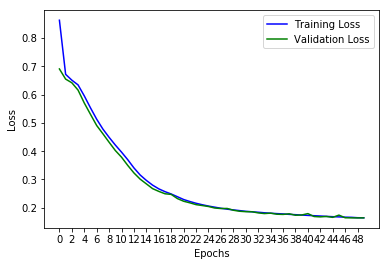

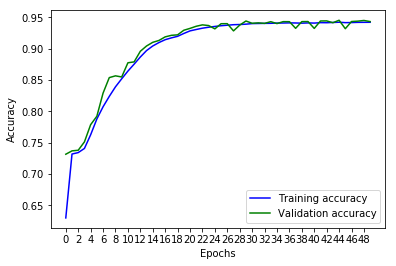

In [75]:
# Plot Training loss and Validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,50)[0::2])
plt.legend()
plt.show()

# Plot Training accuracy and Validation accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc, 'blue', label='Training accuracy')
plt.plot(val_acc, 'green', label='Validation accuracy')
plt.xticks(range(0,50)[0::2])
plt.legend()
plt.show()

We observe that the training and validation accuracy and losses both start merging with each other after ~10 epochs, proving that the model is trained well and there is no overfitting. 

### List of Validation Accuracy: 

|  Model |  Validation Accuracy
| :- |:-
| Random Forest | 88% 
| Super Learner | 82% 
| Artificial Neural network (ANN) | 95% 


Since ANN is giving the highest overall accuracy and lowest overall loss, we select this as our state-based learner for the Lunar lander task.

### Evaluation experiment on the model

Now, we select ANN as our best state-based Supervised learning model, and predict the model usign test set. We calculate accuracy and the confusion matrix for the action labels.

In [76]:
# Testing on the test set
y_pred = ann_model.predict_classes(X_test)

print("Accuracy of ANN on test set is :", metrics.accuracy_score(y_test, y_pred))
print("Classification report of ANN : \n", metrics.classification_report(y_test, y_pred))
# Confusion matrix
pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy of ANN on test set is : 0.942548158161541
Classification report of ANN : 
              precision    recall  f1-score   support

          0       0.93      0.98      0.96     23574
          1       0.84      0.46      0.59      1780
          2       0.96      0.98      0.97     23187
          3       0.78      0.50      0.61      1762

avg / total       0.94      0.94      0.94     50303



Predicted,0,1,2,3,All
True,,,,,
0,23066,101,227,180,23574
1,664,811,304,1,1780
2,413,54,22658,62,23187
3,529,0,355,878,1762
All,24672,966,23544,1121,50303


####  Since we observe that highest accuracy and lowest loss is in the Artificial neural network model, we  persist the model for future use without having to retrain it.

Save the model into persistent file

In [35]:
filepath = "player_state.mod"
ann_model.save(filepath)